In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel




# Load Data

In [2]:
# load the data into a pandas dataframe

data_path = r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Data\portuguesebankall.csv"
df = pd.read_csv(data_path)

# preview data
df.info()
df.head
print(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        41188 non-null  int64  
 1   JOB        41188 non-null  object 
 2   MARITAL    41188 non-null  object 
 3   EDUCATION  41188 non-null  object 
 4   DEFAULT    41188 non-null  object 
 5   HOUSING    41188 non-null  object 
 6   LOAN       41188 non-null  object 
 7   CONTACT    41188 non-null  object 
 8   MONTH      41188 non-null  object 
 9   DOW        41188 non-null  object 
 10  DURATION   41188 non-null  int64  
 11  CAMPAIGN   41188 non-null  int64  
 12  PDAYS      41188 non-null  int64  
 13  PREVIOUS   41188 non-null  int64  
 14  POUTCOME   41188 non-null  object 
 15  EMPVAR     41188 non-null  float64
 16  CPI        41188 non-null  float64
 17  CCI        41188 non-null  float64
 18  EURIBOR3M  41188 non-null  float64
 19  NREMP      41188 non-null  float64
 20  RESPON

# Preprocess


In [3]:
# drop unnecessary columns
df.drop(['DURATION'], axis=1, inplace=True)
# convert diagnosis variable to numerical (optional)
df['RESPOND'] = df['RESPOND'].apply(lambda x: 1 if x == 'yes' else 0)
# Convert response from an integer to a categorical variable
df['RESPOND'] = df['RESPOND'].astype('category')
df.head()


,AGE,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,DOW,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,EMPVAR,CPI,CCI,EURIBOR3M,NREMP,RESPOND
0,17,student,single,unknown,no,yes,no,cellular,aug,wed,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,0
1,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,0
2,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,0
3,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,1
4,17,student,single,unknown,no,no,yes,cellular,oct,tue,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,1


# Use the statsmodels approach (see Field Goal example and Lost Sales example) to fit a full logistic regression model to the data and then fit a reduced logistic model to the data and compare the results. Create a training and test data set and compare models based on the test set


# Train Test Split for the full model (minus job, marital, housing, and loan)

In [4]:
# split the data into training and testing sets
X = df.drop(['RESPOND'], axis=1)
#Full model minus variables causing singularities in the model
X=df[['AGE', 'EDUCATION','DEFAULT','CONTACT', 'MONTH','DOW','CAMPAIGN','PDAYS','PREVIOUS','POUTCOME','EMPVAR', 'CPI','CCI','EURIBOR3M','NREMP']]
#Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns=['EDUCATION','DEFAULT','CONTACT','MONTH','DOW','POUTCOME'], drop_first=True)

y = df['RESPOND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()




<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 39075 to 15795
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AGE                            28831 non-null  int64  
 1   CAMPAIGN                       28831 non-null  int64  
 2   PDAYS                          28831 non-null  int64  
 3   PREVIOUS                       28831 non-null  int64  
 4   EMPVAR                         28831 non-null  float64
 5   CPI                            28831 non-null  float64
 6   CCI                            28831 non-null  float64
 7   EURIBOR3M                      28831 non-null  float64
 8   NREMP                          28831 non-null  float64
 9   EDUCATION_basic.6y             28831 non-null  bool   
 10  EDUCATION_basic.9y             28831 non-null  bool   
 11  EDUCATION_high.school          28831 non-null  bool   
 12  EDUCATION_illiterate           28831 non-null  

# Full Logistic Regression Model Using statsmodels
Train the model on the training set - evaluate the model on both the training and test sets

In [10]:
#Fit full logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y=y_train


logit_full = sm.Logit(y, X.astype(float)).fit()

#Print summary
print(logit_full.summary())



         Current function value: 0.274995
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                RESPOND   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28796
Method:                           MLE   Df Model:                           34
Date:                Wed, 30 Oct 2024   Pseudo R-squ.:                  0.2134
Time:                        09:49:49   Log-Likelihood:                -7928.4
converged:                      False   LL-Null:                       -10079.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -194.3732     40.003     -4.859      0.000    -272.777    -115.969
AGE     

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Evaluate Full Model on Training and Test Set

In [14]:
# Generate predicted values for training set
pprob = logit_full.predict(X.astype(float))

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test.astype(float))

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()



<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 39075 to 15795
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   AGE                            28831 non-null  int64   
 1   CAMPAIGN                       28831 non-null  int64   
 2   PDAYS                          28831 non-null  int64   
 3   PREVIOUS                       28831 non-null  int64   
 4   EMPVAR                         28831 non-null  float64 
 5   CPI                            28831 non-null  float64 
 6   CCI                            28831 non-null  float64 
 7   EURIBOR3M                      28831 non-null  float64 
 8   NREMP                          28831 non-null  float64 
 9   EDUCATION_basic.6y             28831 non-null  bool    
 10  EDUCATION_basic.9y             28831 non-null  bool    
 11  EDUCATION_high.school          28831 non-null  bool    
 12  EDUCATION_illiterate           28

Generate confusion matrices for training and test sets

In [15]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print(conf_matrix)

[[25286  2523]
 [  331   691]]
[[10796  1113]
 [  135   313]]


Create ROC curves for training and test sets

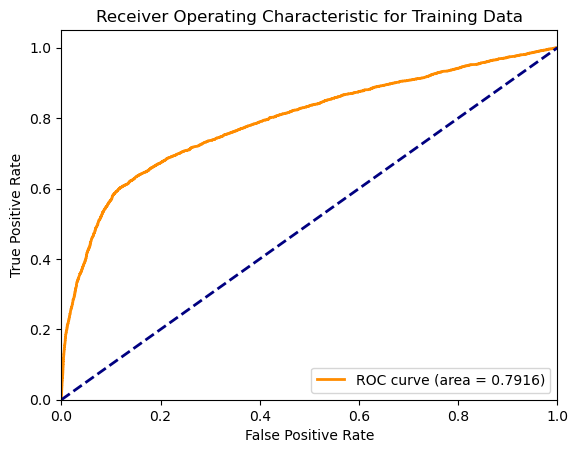

In [16]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, pprob)
roc_auc = roc_auc_score(y_train.cat.codes, pprob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


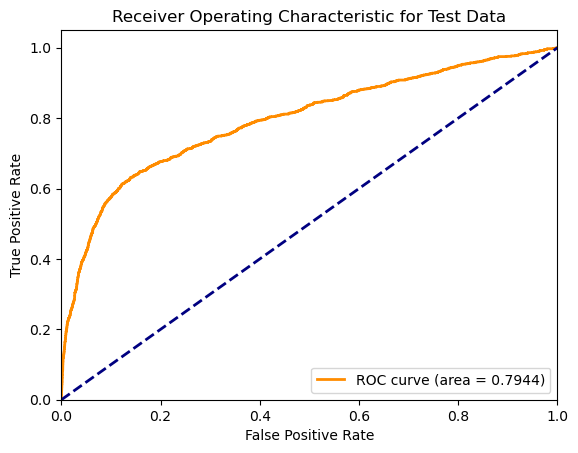

In [17]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, pprob_test)
roc_auc = roc_auc_score(y_test.cat.codes, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


Compute Accuracy, Precision, Recall for training and test sets

In [18]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("")


Accuracy (Train) : 0.9010
Precision (Train): 0.6761
Recall (Train)  : 0.2150

Accuracy (Test) : 0.8990
Precision (Test): 0.6987
Recall (Test)  : 0.2195



# Continuing with the statsmodels implementation, fit a reduced logistic regression (from stepwise variable selection)

In [19]:
# split the data into training and testing sets
X2 = df.drop(['RESPOND'], axis=1)
X2=df[['DEFAULT','CONTACT', 'MONTH','DOW','CAMPAIGN','PDAYS','POUTCOME','EMPVAR', 'CPI','CCI','NREMP']]
X2 = pd.get_dummies(X2, columns=['DEFAULT','CONTACT','MONTH','DOW','POUTCOME'], drop_first=True)

y2 = df['RESPOND']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_train.info()
y2_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 39075 to 15795
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CAMPAIGN              28831 non-null  int64  
 1   PDAYS                 28831 non-null  int64  
 2   EMPVAR                28831 non-null  float64
 3   CPI                   28831 non-null  float64
 4   CCI                   28831 non-null  float64
 5   NREMP                 28831 non-null  float64
 6   DEFAULT_unknown       28831 non-null  bool   
 7   DEFAULT_yes           28831 non-null  bool   
 8   CONTACT_telephone     28831 non-null  bool   
 9   MONTH_aug             28831 non-null  bool   
 10  MONTH_dec             28831 non-null  bool   
 11  MONTH_jul             28831 non-null  bool   
 12  MONTH_jun             28831 non-null  bool   
 13  MONTH_mar             28831 non-null  bool   
 14  MONTH_may             28831 non-null  bool   
 15  MONTH_nov           

In [21]:
#Fit reduced (stepwise) logistic regression model to examine the significance of the terms
X2 = X2_train
X2 = sm.add_constant(X2)
y2=y2_train

logit_step = sm.Logit(y2, X2.astype(float)).fit()

#Print summary
print(logit_step.summary())


         Current function value: 0.275233
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                RESPOND   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28806
Method:                           MLE   Df Model:                           24
Date:                Wed, 30 Oct 2024   Pseudo R-squ.:                  0.2127
Time:                        09:58:10   Log-Likelihood:                -7935.2
converged:                      False   LL-Null:                       -10079.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -240.3714     32.774     -7.334      0.000    -304.607    -176.136
CAMPAIGN                -0.0512    

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
# Generate predicted values for training set
pprob2 = logit_step.predict(X2.astype(float))

# Create predicted category for success using 50% cutoff
psuccess2 = (pprob2 > 0.5).astype(int)

# Add new variables to the training data set
X2_train['p_success'] = psuccess2
X2_train['p_prob'] = pprob2
X2_train['y'] = y2_train

X2_train.info()


# Generate predicted values for test set

X2_test = sm.add_constant(X2_test)

pprob2_test = logit_step.predict(X2_test.astype(float))

# Create predicted category for success using 50% cutoff
psuccess2_test = (pprob2_test > 0.5).astype(int)

# Add new variables to the response data set
X2_test['p_success'] = psuccess2_test
X2_test['p_prob'] = pprob2_test

X2_test.info()



<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 39075 to 15795
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CAMPAIGN              28831 non-null  int64   
 1   PDAYS                 28831 non-null  int64   
 2   EMPVAR                28831 non-null  float64 
 3   CPI                   28831 non-null  float64 
 4   CCI                   28831 non-null  float64 
 5   NREMP                 28831 non-null  float64 
 6   DEFAULT_unknown       28831 non-null  bool    
 7   DEFAULT_yes           28831 non-null  bool    
 8   CONTACT_telephone     28831 non-null  bool    
 9   MONTH_aug             28831 non-null  bool    
 10  MONTH_dec             28831 non-null  bool    
 11  MONTH_jul             28831 non-null  bool    
 12  MONTH_jun             28831 non-null  bool    
 13  MONTH_mar             28831 non-null  bool    
 14  MONTH_may             28831 non-null  bool    
 15  MON

In [23]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess2, y2_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess2_test, y2_test)
print(conf_matrix)

[[25284  2523]
 [  333   691]]
[[10800  1114]
 [  131   312]]


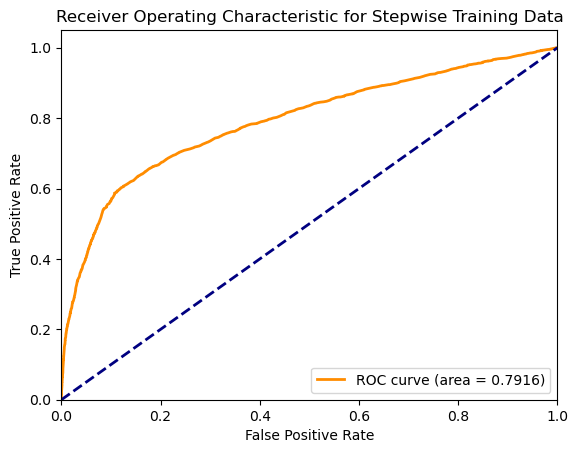

In [24]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y2_train.cat.codes, pprob2)
roc_auc = roc_auc_score(y2_train.cat.codes, pprob2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Training Data')
plt.legend(loc='lower right')
plt.show()

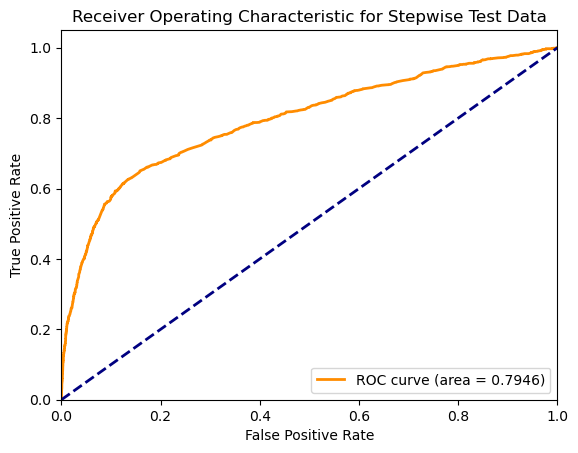

In [25]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y2_test.cat.codes, pprob2_test)
roc_auc = roc_auc_score(y2_test.cat.codes, pprob2_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Test Data')
plt.legend(loc='lower right')
plt.show()


In [26]:
# calculate the accuracy, precision, and recall scores
acc_train2 = accuracy_score(y2_train, psuccess2)
prec_train2 = precision_score(y2_train, psuccess2)
rec_train2 = recall_score(y2_train, psuccess2)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train2))
print("Precision (Train): {:.4f}".format(prec_train2))
print("Recall (Train)  : {:.4f}".format(rec_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc_test2 = accuracy_score(y2_test, psuccess2_test)
prec_test2 = precision_score(y2_test, psuccess2_test)
rec_test2 = recall_score(y2_test, psuccess2_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test2))
print("Precision (Test): {:.4f}".format(prec_test2))
print("Recall (Test)  : {:.4f}".format(rec_test2))
print("")


Accuracy (Train) : 0.9009
Precision (Train): 0.6748
Recall (Train)  : 0.2150

Accuracy (Test) : 0.8992
Precision (Test): 0.7043
Recall (Test)  : 0.2188



# sklearn implementation with L1 and L2 Regularization (LASSO, Ridge Regression, Elastic Net)

In [27]:
# split the data into training and testing sets
X3 = df.drop(['RESPOND'], axis=1)
X3=df[['AGE', 'JOB','MARITAL','EDUCATION','DEFAULT','HOUSING','LOAN','CONTACT', 'MONTH','DOW','CAMPAIGN','PDAYS','PREVIOUS','POUTCOME','EMPVAR', 'CPI','CCI','EURIBOR3M','NREMP']]
X3 = pd.get_dummies(X3, columns=['JOB', 'MARITAL', 'EDUCATION','DEFAULT','HOUSING','LOAN','CONTACT','MONTH','DOW','POUTCOME'], drop_first=True)

y3 = df['RESPOND']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()

y3_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 39075 to 15795
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AGE                            28831 non-null  int64  
 1   CAMPAIGN                       28831 non-null  int64  
 2   PDAYS                          28831 non-null  int64  
 3   PREVIOUS                       28831 non-null  int64  
 4   EMPVAR                         28831 non-null  float64
 5   CPI                            28831 non-null  float64
 6   CCI                            28831 non-null  float64
 7   EURIBOR3M                      28831 non-null  float64
 8   NREMP                          28831 non-null  float64
 9   JOB_blue-collar                28831 non-null  bool   
 10  JOB_entrepreneur               28831 non-null  bool   
 11  JOB_housemaid                  28831 non-null  bool   
 12  JOB_management                 28831 non-null  

#Fit Logistic Regression Models using L1, L2, and Elastic Net

In [28]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X3_train, y3_train)
lr_l1_01.fit(X3_train, y3_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

# fit the models to the training data
lr_l2.fit(X3_train, y3_train)
lr_l12.fit(X3_train, y3_train)




c:\Users\trush\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\trush\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [29]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X3.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
df_coefficients12 = rpt_model_variables(lr_l12)

                          feature  coefficient  abs_coefficient
41                      MONTH_mar       0.8651           0.8651
42                      MONTH_may      -0.5910           0.5910
51               POUTCOME_success       0.5265           0.5265
50           POUTCOME_nonexistent       0.4174           0.4174
36              CONTACT_telephone      -0.3677           0.3677
5                             CPI       0.2731           0.2731
43                      MONTH_nov      -0.2558           0.2558
4                          EMPVAR      -0.2546           0.2546
30                DEFAULT_unknown      -0.2538           0.2538
46                        DOW_mon      -0.2521           0.2521
13                    JOB_retired       0.2060           0.2060
39                      MONTH_jul       0.1899           0.1899
9                 JOB_blue-collar      -0.1206           0.1206
15                   JOB_services      -0.0840           0.0840
49                        DOW_wed       

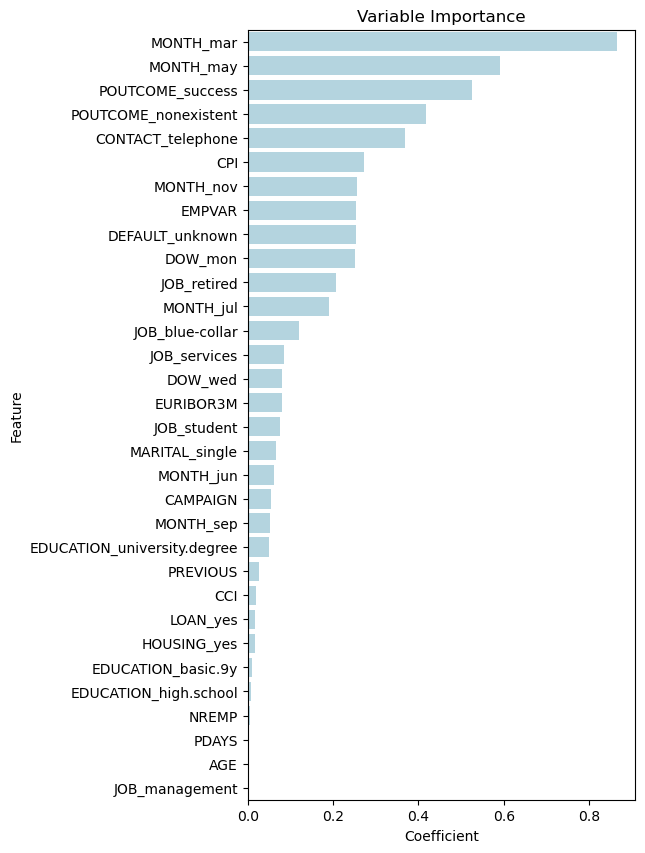

-- rejected --
 DEFAULT_yes
 JOB_unemployed
 JOB_entrepreneur
 JOB_housemaid
 DOW_tue
 DOW_thu
 JOB_self-employed
 MONTH_oct
 JOB_technician
 JOB_unknown
 HOUSING_unknown
 MARITAL_married
 MARITAL_unknown
 MONTH_dec
 MONTH_aug
 EDUCATION_basic.6y
 EDUCATION_professional.course
 LOAN_unknown
 EDUCATION_unknown
 EDUCATION_illiterate


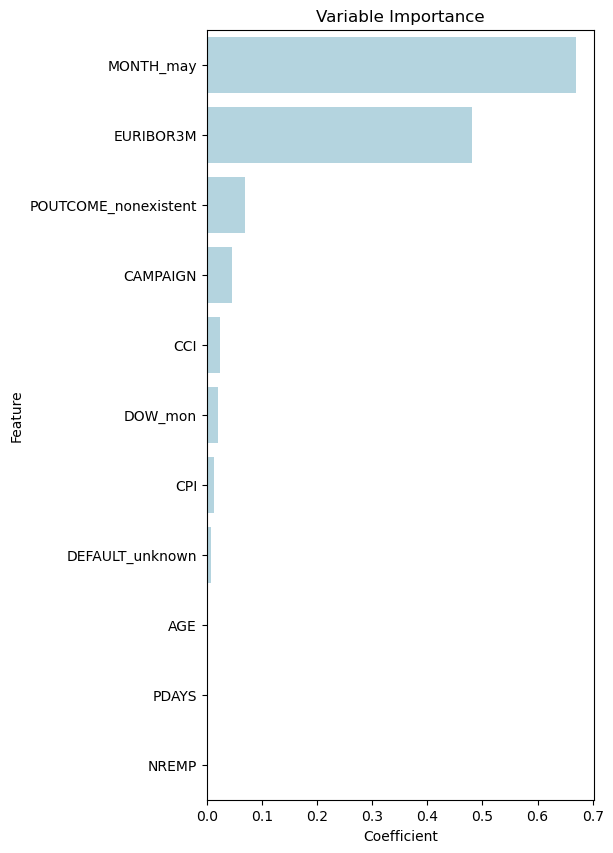

-- rejected --
 DOW_tue
 MONTH_aug
 DEFAULT_yes
 HOUSING_unknown
 HOUSING_yes
 LOAN_unknown
 LOAN_yes
 CONTACT_telephone
 MONTH_dec
 DOW_thu
 MONTH_jul
 MONTH_jun
 MONTH_mar
 DOW_wed
 EDUCATION_unknown
 MONTH_oct
 MONTH_sep
 MONTH_nov
 EDUCATION_illiterate
 EDUCATION_university.degree
 EDUCATION_professional.course
 PREVIOUS
 EMPVAR
 JOB_blue-collar
 JOB_entrepreneur
 JOB_housemaid
 JOB_management
 JOB_retired
 JOB_self-employed
 JOB_services
 JOB_student
 JOB_technician
 JOB_unemployed
 JOB_unknown
 MARITAL_married
 MARITAL_single
 MARITAL_unknown
 EDUCATION_basic.6y
 EDUCATION_basic.9y
 EDUCATION_high.school
 POUTCOME_success


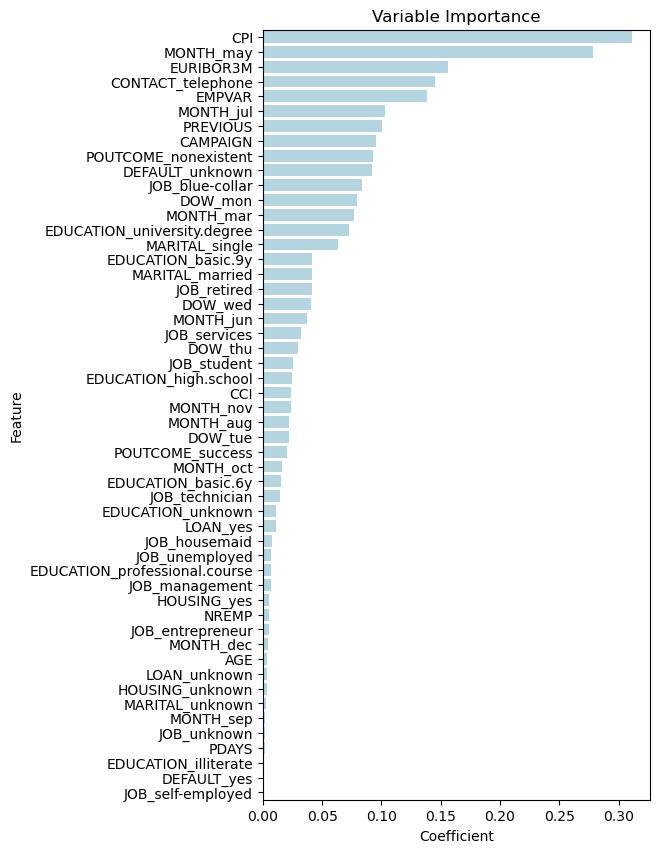

-- rejected --


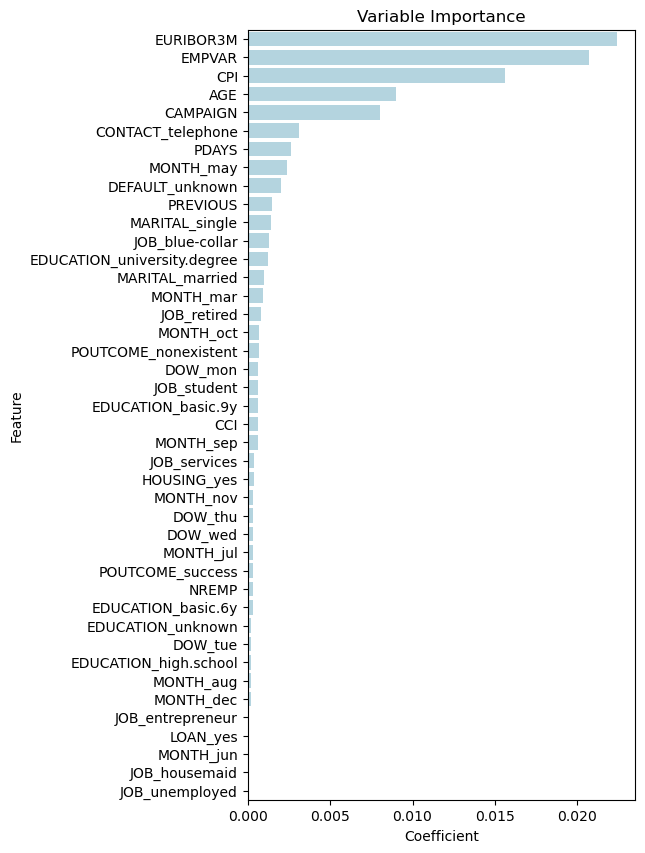

-- rejected --
 JOB_self-employed
 JOB_management
 MARITAL_unknown
 JOB_technician
 JOB_unknown
 DEFAULT_yes
 LOAN_unknown
 EDUCATION_professional.course
 HOUSING_unknown
 EDUCATION_illiterate


In [30]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

# Make Predictions on the training and testing data for each model

In [31]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X3_train)
y_pred_test = lr_l1_1.predict(X3_test)
y_proba_train = lr_l1_1.predict_proba(X3_train)
y_proba_test = lr_l1_1.predict_proba(X3_test)

y_pred_train1 = lr_l1_01.predict(X3_train)
y_pred_test1 = lr_l1_01.predict(X3_test)
y_proba_train1 = lr_l1_01.predict_proba(X3_train)
y_proba_test1 = lr_l1_01.predict_proba(X3_test)

y_pred_train2 = lr_l2.predict(X3_train)
y_pred_test2 = lr_l2.predict(X3_test)
y_proba_train2 = lr_l2.predict_proba(X3_train)
y_proba_test2 = lr_l2.predict_proba(X3_test)

y_pred_train12 = lr_l12.predict(X3_train)
y_pred_test12 = lr_l12.predict(X3_test)
y_proba_train12 = lr_l12.predict_proba(X3_train)
y_proba_test12 = lr_l12.predict_proba(X3_test)





## Calculate Accuracy, Precision, Recall for each model on training and test set


L1 with c=0.1

In [32]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y3_train, y_pred_train)
prec3_train = precision_score(y3_train, y_pred_train)
rec3_train = recall_score(y3_train, y_pred_train)
auc3_train = roc_auc_score(y3_train, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y3_test, y_pred_test)
prec3_test = precision_score(y3_test, y_pred_test)
rec3_test = recall_score(y3_test, y_pred_test)
auc3_test = roc_auc_score(y3_test, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))
print("AUC      : {:.4f}".format(auc3_test))

 -- train set -- 
Accuracy : 0.9008
Precision: 0.6809
Recall.  : 0.2078
AUC      : 0.7912

 -- test set -- 
Accuracy : 0.8983
Precision: 0.6988
Recall.  : 0.2083
AUC      : 0.7944


L1 with c=0.01

In [33]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y3_train, y_pred_train1)
prec3_train1 = precision_score(y3_train, y_pred_train1)
rec3_train1 = recall_score(y3_train, y_pred_train1)
auc3_train1 = roc_auc_score(y3_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y3_test, y_pred_test1)
prec3_test1 = precision_score(y3_test, y_pred_test1)
rec3_test1 = recall_score(y3_test, y_pred_test1)
auc3_test1 = roc_auc_score(y3_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.9002
Precision: 0.6854
Recall.  : 0.1938
AUC      : 0.7769

 -- test set -- 
Accuracy : 0.8982
Precision: 0.7100
Recall.  : 0.1992
AUC      : 0.7828


L2 regularization

In [34]:
# calculate the accuracy, precision, and recall scores
acc3_train2 = accuracy_score(y3_train, y_pred_train2)
prec3_train2 = precision_score(y3_train, y_pred_train2)
rec3_train2 = recall_score(y3_train, y_pred_train2)
auc3_train2 = roc_auc_score(y3_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train2))
print("Precision: {:.4f}".format(prec3_train2))
print("Recall.  : {:.4f}".format(rec3_train2))
print("AUC      : {:.4f}".format(auc3_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test2 = accuracy_score(y3_test, y_pred_test2)
prec3_test2 = precision_score(y3_test, y_pred_test2)
rec3_test2 = recall_score(y3_test, y_pred_test2)
auc3_test2 = roc_auc_score(y3_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test2))
print("Precision: {:.4f}".format(prec3_test2))
print("Recall.  : {:.4f}".format(rec3_test2))
print("AUC      : {:.4f}".format(auc3_test2))

 -- train set -- 
Accuracy : 0.9001
Precision: 0.6898
Recall.  : 0.1889
AUC      : 0.7790

 -- test set -- 
Accuracy : 0.8984
Precision: 0.7280
Recall.  : 0.1914
AUC      : 0.7786


Elastic Net

In [35]:
# calculate the accuracy, precision, and recall scores
acc3_train12 = accuracy_score(y3_train, y_pred_train12)
prec3_train12 = precision_score(y3_train, y_pred_train12)
rec3_train12 = recall_score(y3_train, y_pred_train12)
auc3_train12 = roc_auc_score(y3_train, y_proba_train12[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train12))
print("Precision: {:.4f}".format(prec3_train12))
print("Recall.  : {:.4f}".format(rec3_train12))
print("AUC      : {:.4f}".format(auc3_train12))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test12 = accuracy_score(y3_test, y_pred_test12)
prec3_test12 = precision_score(y3_test, y_pred_test12)
rec3_test12 = recall_score(y3_test, y_pred_test12)
auc3_test12 = roc_auc_score(y3_test, y_proba_test12[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test12))
print("Precision: {:.4f}".format(prec3_test12))
print("Recall.  : {:.4f}".format(rec3_test12))
print("AUC      : {:.4f}".format(auc3_test12))

 -- train set -- 
Accuracy : 0.8980
Precision: 0.6290
Recall.  : 0.2063
AUC      : 0.7166

 -- test set -- 
Accuracy : 0.8965
Precision: 0.6594
Recall.  : 0.2132
AUC      : 0.7206
